# WEEK 1 LABS 1:

## 1) Solving linear equations graphically:

In [257]:
using Pkg
Pkg.add("Plots") # Install the Plots package
Pkg.add("LinearSolve") # Install the LinearSolve package (useful for linear equations)
Pkg.add("NonlinearSolve") # Install the NonlinearSolve package (useful for nonlinear equations)
Pkg.add("QuadGK") #numerical integration package
using Plots 
using NonlinearSolve: NonlinearProblem, solve
using QuadGK: quadgk
gr() # uses GR backend for plotting

   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`


Plots.GRBackend()

Intersection point: (0.2, 0.3)


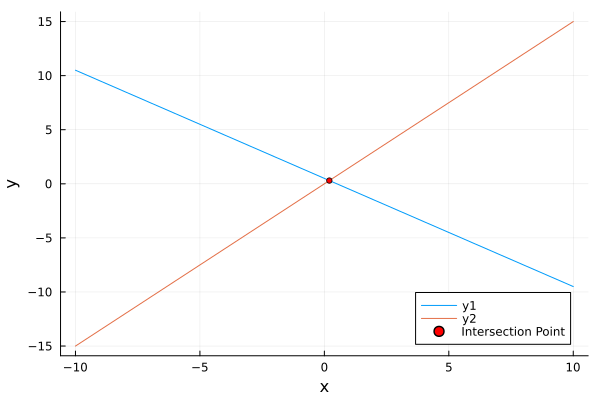

In [258]:
y1 = x -> (1 - 2x)/2 # 2x + 2y = 1 rearranged for y
y2 = x -> 3x/2 # 3x - 3y = 0 rearranged for y

x = -10:10

# Finding intersection point:
    # 3x/2 = (1 - 2x)/2
    # 3x = 1 - 2x
    # 5x = 1 therfore x = 1/5
x_intersect = 1/5
y_intersect = y1(x_intersect) # or y2(x_intersect)
println("Intersection point: (", x_intersect, ", ", y_intersect, ")")

plot(x, y1.(x)) # plot y1
plot!(x, y2.(x)) # plot y2 on same graph
scatter!([x_intersect], [y_intersect], color=:red, label="Intersection Point", markersize=3)
xlabel!("x")
ylabel!("y")


## 2) Solving non linear equations graphically:

### A)

First intersection point: (-3,4)
Second intersection point: (2,-1)


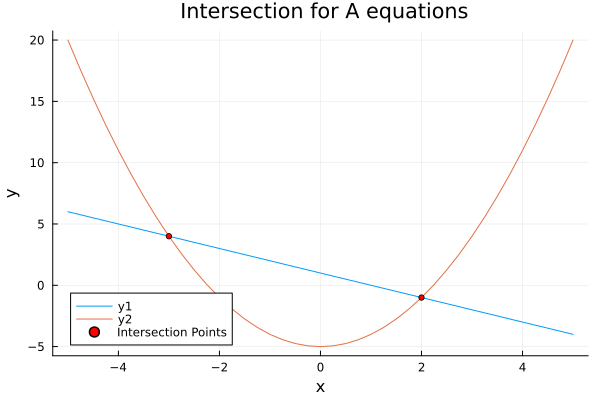

In [259]:
y1 = x -> (1 - x) # Rearranged x + y = 1 for y, eqn 1
y2 = x -> (x^2 - 5) # eqn 2 

# Finding intersection points:
    # 1-x = x^2 - 5
    # x^2  + x - 6 = 0 
    # factor out to (x-3)(x+2) = 0 so solutions at x = -3 and x = 2
x_intersect1 = -3
y_intersect1 = y1(x_intersect1)
x_intersect2 = 2
y_intersect2 = y1(x_intersect2)
println("First intersection point: (", x_intersect1, ",", y_intersect1, ")")
println("Second intersection point: (", x_intersect2, "," , y_intersect2, ")")

x = -5:0.25:5
plot(x, y1.(x)) # plot y1
plot!(x, y2.(x)) # plot y2 on same graph
scatter!([x_intersect1, x_intersect2], [y_intersect1, y_intersect2], color=:red, label="Intersection Points", markersize=3)
xlabel!("x")
ylabel!("y")
title!(" Intersection for A equations")


### B)

Approximate intersection points can be found using numerical methods or graphically.


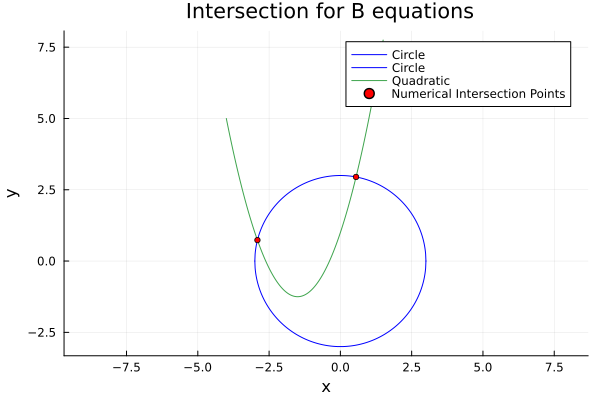

First intersection point: (-2.91,0.73)
Second intersection point: (0.55,2.95)


In [260]:
y1 = x -> (9 - x^2)^(1/2) # Rearranged x^2 + y^2 = 9 for y upper half of circle
y1_lower = x -> -(9 - x^2)^(1/2) # Lower half of circle
y2 = x -> (x^2 + 3x + 1) 

x1 = -3:0.01:3
x2 = -4:0.01:1.5

#plot circle:
p = plot(x1, [y1.(x1), y1_lower.(x1)], aspect_ratio=:equal, color=:blue, label="Circle")
# plot!(x1, y1_lower.(x1), aspect_ratio=:equal, color=:blue, label="Circle lower half")

#plot quadratic:
plot!(x2, y2.(x2), aspect_ratio=:equal, label="Quadratic")
xlabel!("x")
ylabel!("y")
title!(" Intersection for B equations")

println("Approximate intersection points can be found using numerical methods or graphically.")
#points of intersection:
# first we can try to raw compute a solution:
# solving (9 - x^2)^(1/2) = x^2 + 3x + 1 -> 9-x^2 = (x^2 + 3x + 1)^2 which gives 9 -x^2 = x^4 + 6x^3 + 10x^2 + 6x + 1 -9 + x^2
# rearranging gives x^4 + 6x^3 + 11x^2 + 6x -8 = 0
# this is very complicated to solve by hand so we can use a numerical solver or graphing methods to find approximate solutions.
# lets use NonLinearSolve for the dirty work.

g(x,p) = y1.(x) - y2.(x)

problem1 = NonlinearProblem(g, -2.6) #initial guess near -2.6 for solution
sol1 = solve(problem1)
x_intercept1 = sol1.u

problem2 = NonlinearProblem(g, 1.0) #initial guess near 1.0 for solution
sol2 = solve(problem2)
x_intercept2 = sol2.u

y_sol1 = (9 - (x_intercept1)^2)^(1/2)
y_sol2 = (9 - (x_intercept2)^2)^(1/2)

scatter!([x_intercept1, x_intercept2], [y_sol1, y_sol2], color=:red, 
          label="Numerical Intersection Points", markersize=3)
display(p)

println("First intersection point: (", round(x_intercept1, sigdigits=3), ",", round(y_sol1, sigdigits=2), ")")
println("Second intersection point: (", round(x_intercept2, sigdigits=2), "," , round(y_sol2, sigdigits=3), ")")

### C)

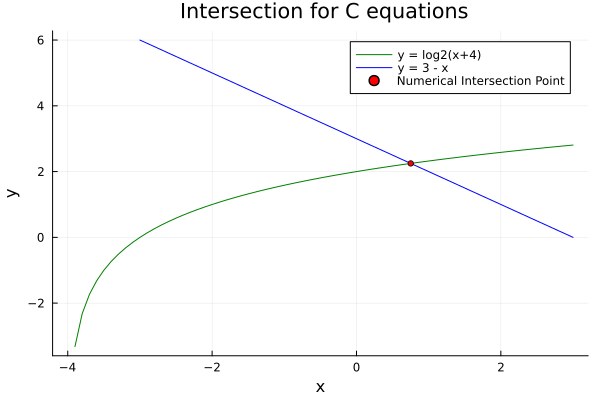

1 intersection point at: (0.75,2.25)


In [261]:
y1 = x -> log2(x+4)
y2 = x -> 3 - x 

x1 = -4:0.1:3
x2 = -3:0.1:3

#plotting y1:
p = plot(x1, y1.(x1), color=:green, label="y = log2(x+4)")

#plotting y2:
plot!(x2, y2.(x2), color=:blue, label="y = 3 - x")

xlabel!("x")
ylabel!("y")
title!(" Intersection for C equations")

#solving for intersection points by hand first:
    # log2(x+4) = 3 - x -> x+4 = 2^3/2^x -> (x+4)*2^x - 8 = 0
    #cannot solve by hand easily, once again use numerical methods + graphing to approximate solutions

g(x,p) = y1.(x) - y2.(x)
problem = NonlinearProblem(g, 0.7) #initial guess of 0.7 based on graph which also only shows 1 intersection point
sol = solve(problem)
x_intercept = sol.u
y_intercept = y1(x_intercept)
scatter!([x_intercept], [y_intercept], color=:red, 
          label="Numerical Intersection Point", markersize=3)
display(p)
println("1 intersection point at: (", round(x_intercept, sigdigits=2), ",", round(y_intercept, sigdigits=3), ")")

## Exercise 3:

### Curve a:

Estimated area between x = 0 and x = π under the curve y = cos(x) is approximately 4.0


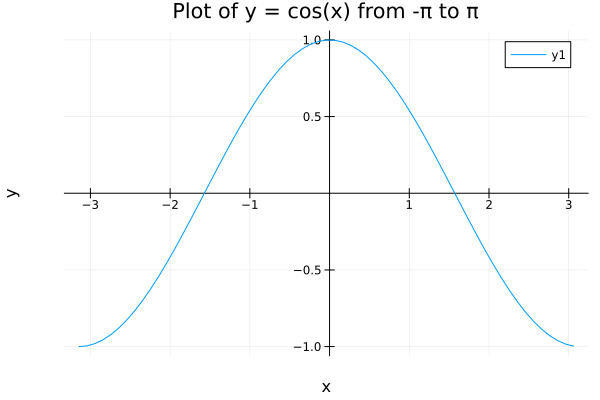

In [262]:
f(x) = cos(x)
x1 = -pi:0.1:pi
p = plot(x1, f.(x1), framestyle=:origin)
xlabel!("x")
ylabel!("y")
title!("Plot of y = cos(x) from -π to π")
#estimated area = 4
# lets do numerical integration to confirm using QuadGK:
area, err = quadgk(x -> abs(cos(x)), -pi, pi)
println("Estimated area between x = 0 and x = π under the curve y = cos(x) is approximately ", round(area, sigdigits=4))
display(p)

### Curve b

Estimated absolute area between x = -π and x = π/2 under the curve y = cos^2(x) - sin(x) is approximately 4.51
Estimated area between x = -π and x = π/2 under the curve y = cos^2(x) - sin(x) is approximately 3.356


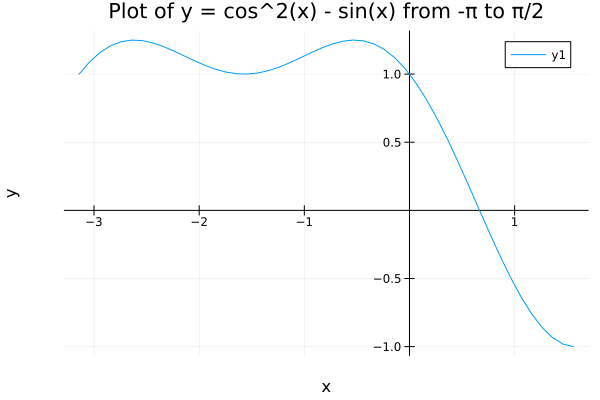

In [263]:
f(x) = (cos(x))^2 - sin(x) #define function
x1 = -pi:0.1:(pi/2) #x range
p = plot(x1, f.(x1), framestyle=:origin) #plot 
xlabel!("x")
ylabel!("y")
title!("Plot of y = cos^2(x) - sin(x) from -π to π/2")
#estimated area via numerical methods:
area, err = quadgk(x->abs(f(x)), -pi, pi/2)
area2, err2 = quadgk(f, -pi, pi/2)
println("Estimated absolute area between x = -π and x = π/2 under the curve y = cos^2(x) - sin(x) is approximately ", round(area, sigdigits=4))
println("Estimated area between x = -π and x = π/2 under the curve y = cos^2(x) - sin(x) is approximately ", round(area2, sigdigits=4))
display(p)


### Curve C

Estimated area between x = -10 and x = 0 under the curve y = e^x - 10^x is approximately 0.5657


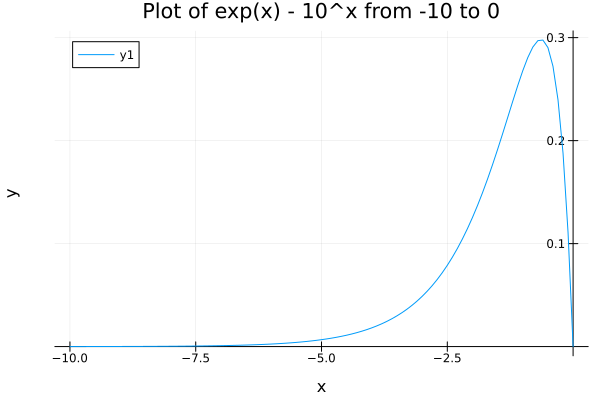

In [264]:
f(x) = exp(x) - 10^(x) #define function
x1 = -10:0.1:0 #x range
p = plot(x1, f.(x1), framestyle=:origin, xlabel="x", ylabel="y", title = "Plot of exp(x) - 10^x from -10 to 0") #plot 

#estimated area via numerical methods:
area, err = quadgk(f, -10, 0)
println("Estimated area between x = -10 and x = 0 under the curve y = e^x - 10^x is approximately ", round(area, sigdigits=4))
display(p)

### Curve D

Root found at x = 2.386

Estimated area between x = 0 where x where f(x) > 0 is 13.68


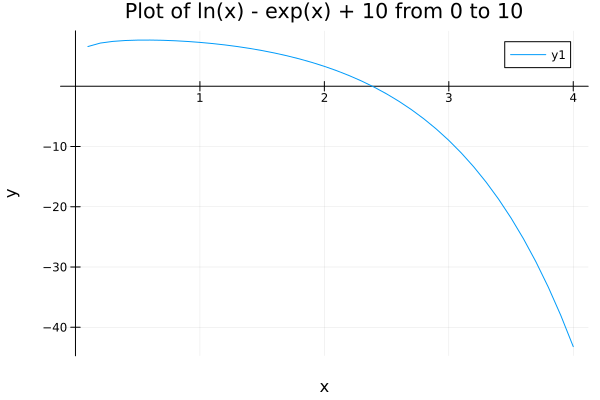

In [265]:
f(x) = log(x) - exp(x) + 10 #define function
x1 = 0:0.1:4 #x range
p = plot(x1, f.(x1), framestyle=:origin, xlabel="x", ylabel="y", title = "Plot of ln(x) - exp(x) + 10 from 0 to 10") #plot 

#as f(x) and 0 must be positive we need to find the root of this function to find area:
g(x,p) = log(x) - exp(x) + 10
problem = NonlinearProblem(g, 2.3) #initial guess near 2.3 for solution based on graph
sol = solve(problem)
x_root = sol.u
println("Root found at x = ", round(x_root, sigdigits=4), "\n")

#Integrate from 0 to root:
area, err = quadgk(f, 0, x_root)
println("Estimated area between x = 0 where x where f(x) > 0 is ", round(area, sigdigits=4))

display(p)

## Exercise 4:

Region of interest between the following points:
Upper Bound Points: (45.2,22.6) and (55.3,27.6)
Lower Bound Points: (46.3,13.7) and (52.7,7.3)


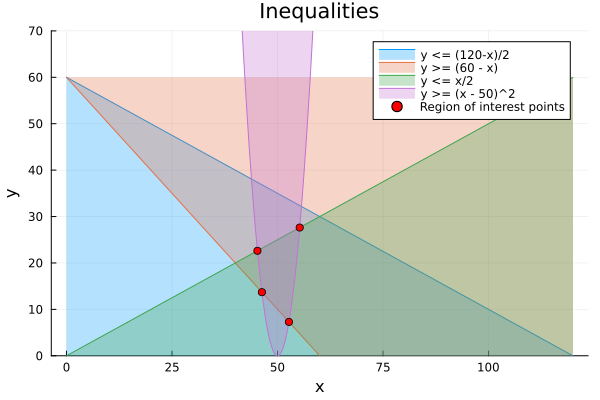

In [266]:
y1 = x -> (120 - x)/2 #less than equal to 
y2 = x -> (60 - x) # greater than equal to
y3 = x -> x/2 # less than equal to 
y4 = x -> (x - 50)^2 #greater than equal to
x = 0:0.1:120
p = plot(x, y1.(x), fillrange=(0, y1.(x)), fillalpha=0.3, label="y <= (120-x)/2", ylims=(0,70))
plot!(x, y2.(x), fillrange=(y2.(x), maximum(y2.(x))), fillalpha=0.3, label="y >= (60 - x)")
plot!(x, y3.(x), fillrange=(0, y3.(x)), fillalpha=0.3, label="y <= x/2")
plot!(x, y4.(x), fillrange=(y4.(x), maximum(y4.(x))), fillalpha=0.3, label="y >= (x - 50)^2")
xlabel!("x")
ylabel!("y")
title!("Inequalities")

#region of interest can be defined by where (x-50)^2 intersects wth x/2 as upper bounds and 
# (60 - x) for lower bounds.

#upper bounds:
f(x,p) = y4(x) - y3(x)
problem1 = NonlinearProblem(f, 40.0)
sol1 = solve(problem1)
problem2 = NonlinearProblem(f, 60.0)
sol2 = solve(problem2)
x_intercept1 = sol1.u
y_intercept1 = y3(x_intercept1)
x_intercept2 = sol2.u
y_intercept2 = y3(x_intercept2)

#lower bounds:
g(x,p) = y4(x) - y2(x)
problem3 = NonlinearProblem(g, 40.0)
sol3 = solve(problem3)
problem4 = NonlinearProblem(g, 60.0)
sol4 = solve(problem4)
x_intercept3 = sol3.u
y_intercept3 = y2(x_intercept3)
x_intercept4 = sol4.u
y_intercept4 = y2(x_intercept4)

# ranges for shading region of interest:
xleft = x_intercept2:0.1:x_intercept4
xright = x_intercept3:0.1:x_intercept1

scatter!([x_intercept1, x_intercept2, x_intercept3, x_intercept4], [y_intercept1, y_intercept2, y_intercept3, y_intercept4], color=:red, 
          label="Region of interest points")

println("Region of interest between the following points:")
println("Upper Bound Points: (", round(x_intercept1, sigdigits=3), ",", round(y_intercept1, sigdigits=3), 
        ") and (", round(x_intercept2, sigdigits=3), ",", round(y_intercept2, sigdigits=3), ")")
println("Lower Bound Points: (", round(x_intercept3, sigdigits=3), ",", round(y_intercept3, sigdigits=3), 
        ") and (", round(x_intercept4, sigdigits=3), ",", round(y_intercept4, sigdigits=3), ")")
display(p)


## Exercise 5:

### 5a: D

df/dx has to be a quadratic function as f(x) is a cubic function and since it has local maxima and minima at those points df/dx has to equal 0 so it should have 2 well defined roots in the region. As such it must be option D


### 5b: C

Integral of f(x) has to be a quartic function as f(x) is cubic such the only option is C.